# Problem Statement

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. 

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset 
df=pd.read_csv("corona_tested.csv")

C:\Users\karthik chary\AppData\Local\Temp\ipykernel_7904\1110292876.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("corona_tested.csv")


In [3]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [4]:
df.shape # exploring number of observations and variables

(278848, 11)

We have 278848 observations and 11 variables. 

## 1) Examining few observations and features or Data Understanding

In [5]:
df.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
5,6,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,None,Contact with confirmed
6,7,11-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Other
7,8,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,negative,None,None,Abroad
8,9,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
9,10,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad


--> Found out 'other' in corona feature.Expecting either positive or negative.
--> Expecting either "M" or "F" in sex column in place of 'None'

In [6]:
df.tail(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278838,278839,30-04-2020,False,False,False,False,False,positive,None,male,Other
278839,278840,30-04-2020,False,False,False,False,False,positive,None,male,Other
278840,278841,30-04-2020,False,False,False,False,False,negative,None,male,Other
278841,278842,30-04-2020,False,False,False,False,False,negative,None,male,Other
278842,278843,30-04-2020,False,False,False,False,False,positive,None,None,Other
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


--> Expecting either "M" or "F" in sex column in place of 'None'

### Examining column names

In [7]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

### Examining data types

In [8]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

### Examining unique values
- It is to check if each column has correct values, specifically categorical variable

In [9]:
df.nunique() # nuniuqe function to count unique values in each column

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

### Observations:

1) Expecting 2 unique values(true or false) in Fever, Sore_throat,Shortness_of_breath, Age_60_above,Cough_symptoms and Headache columns but there are 5.
2) Expecting 2 unique values(male or female) in sex column but there are 3.
3) Expecting 2 unique values(positive or negative) in corona column but there are 3.

In [10]:
df.drop_duplicates()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


### Obervation:

--> no duplicates are present in all columns.

### Summary

In [11]:
df.describe(include ='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


# 2) Data Exploration

1) Missing values
2) Exploring about categorical variables

### 1) Missing values

In [13]:
df.isnull().sum()  # method-1

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [14]:
[features for features in df.columns if df[features].isnull().sum()>0]    # method-2

[]

### Observation: 
    No null values are present in any features.

### 2) Exploring categorical variables

In [15]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [16]:
df["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [17]:
df["Sex"].unique()

array(['None', 'male', 'female'], dtype=object)

In [18]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [19]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [20]:
df['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [21]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [22]:
df['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [23]:
df['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [24]:
df['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [25]:
df['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [26]:
df['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [27]:
df['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [28]:
df['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [29]:
df['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [30]:
df['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [31]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [32]:
Age_60_above_values=df.Age_60_above.value_counts().values
Age_60_above_labels=df.Age_60_above.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02cd3d720>,
 [Text(0.1495399327957422, 1.0897879649268682, 'None'),
  Text(-0.4558771798816149, -1.001087407204379, 'No'),
  Text(1.0537680390265092, -0.31555177059592904, 'Yes')],
 [Text(0.08156723607040482, 0.594429799051019, '45.66%'),
  Text(-0.24866027993542628, -0.5460476766569339, '45.08%'),
  Text(0.5747825667417322, -0.17211914759777944, '9.26%')])

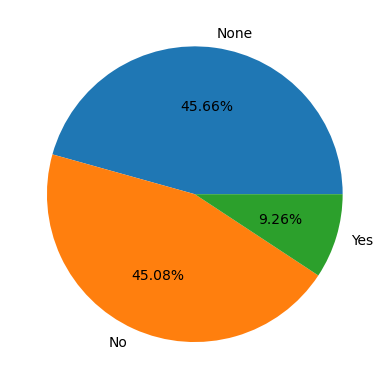

In [33]:
plt.pie(Age_60_above_values,labels=Age_60_above_labels,autopct='%1.2f%%')

### Conclusion:
around 45% of data is missing in Age_60_above column so we cannot consider in model training.

# Data Preprocessing

## 1) Data Cleaning

In [34]:
# cleaning the 'sex' column:

df['Sex']=df['Sex'].replace('None',df['Sex'].mode()[0])
df['Sex']

0         female
1         female
2         female
3         female
4         female
           ...  
278843      male
278844    female
278845      male
278846      male
278847    female
Name: Sex, Length: 278848, dtype: object

In [35]:
df["Sex"].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [36]:
# cleaning the 'corona' column:

df['Corona']=df['Corona'].replace('other',df['Corona'].mode()[0])
df['Corona']

0         negative
1         positive
2         positive
3         negative
4         negative
            ...   
278843    positive
278844    negative
278845    negative
278846    negative
278847    negative
Name: Corona, Length: 278848, dtype: object

In [37]:
df["Corona"].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

In [38]:
# cleaning the 'fever' column:

df['Fever']=df['Fever'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [39]:
df['Fever'].unique()

array(['false', 'true', 'none', False, True], dtype=object)

In [40]:
df['Fever']=df['Fever'].apply(lambda x: 'false' if x==False else x)
df['Fever']=df['Fever'].apply(lambda x: 'true' if x==True else x)

In [41]:
df['Fever'].unique()

array(['false', 'true', 'none'], dtype=object)

In [42]:
df['Fever']=df['Fever'].replace('none', df['Fever'].mode()[0])

In [43]:
df['Fever'].value_counts()

false    257096
true      21752
Name: Fever, dtype: int64

In [44]:
# cleaning the 'Cough_symptoms' column:

df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'false' if x==False else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'true' if x==True else x)
df['Cough_symptoms']=df['Cough_symptoms'].replace('none', df['Cough_symptoms'].mode()[0])

In [45]:
df['Cough_symptoms'].unique()

array(['true', 'false'], dtype=object)

In [46]:
df['Cough_symptoms'].value_counts()

false    236620
true      42228
Name: Cough_symptoms, dtype: int64

In [47]:
# cleaning 'Headache' column:

df['Headache']=df['Headache'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Headache']=df['Headache'].apply(lambda x: 'false' if x==False else x)
df['Headache']=df['Headache'].apply(lambda x: 'true' if x==True else x)
df['Headache']=df['Headache'].replace('none', df['Headache'].mode()[0])

In [48]:
df['Headache'].unique()

array(['false', 'true'], dtype=object)

In [49]:
df['Headache'].value_counts()

false    276434
true       2414
Name: Headache, dtype: int64

In [50]:
# cleaning the 'Sore_throat' column:

df['Sore_throat']=df['Sore_throat'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'false' if x==False else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'true' if x==True else x)
df['Sore_throat']=df['Sore_throat'].replace('none', df['Sore_throat'].mode()[0])

In [51]:
df['Sore_throat'].value_counts()

false    276922
true       1926
Name: Sore_throat, dtype: int64

In [52]:
# cleaning the 'Shortness_of_breath' column:

df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'false' if x==False else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'true' if x==True else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].replace('none', df['Shortness_of_breath'].mode()[0])

In [53]:
df['Shortness_of_breath'].value_counts()

false    277271
true       1577
Name: Shortness_of_breath, dtype: int64

In [54]:
df.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
5,6,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
6,7,11-03-2020,false,false,false,false,false,negative,None,female,Other
7,8,11-03-2020,false,true,false,false,false,negative,None,female,Abroad
8,9,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
9,10,11-03-2020,true,false,true,false,false,negative,None,female,Abroad


In [55]:
df.tail(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278838,278839,30-04-2020,false,false,false,false,false,positive,None,male,Other
278839,278840,30-04-2020,false,false,false,false,false,positive,None,male,Other
278840,278841,30-04-2020,false,false,false,false,false,negative,None,male,Other
278841,278842,30-04-2020,false,false,false,false,false,negative,None,male,Other
278842,278843,30-04-2020,false,false,false,false,false,positive,None,female,Other
278843,278844,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,None,male,Other
278847,278848,30-04-2020,false,false,false,false,false,negative,None,female,Other


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [57]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,None,male,Other


In [58]:
Fever_values=df.Fever.value_counts().values
Fever_labels=df.Fever.value_counts().index

In [59]:
Fever_labels

Index(['false', 'true'], dtype='object')

([<matplotlib.patches.Wedge at 0x1c035062cb0>,
 [Text(-1.0671336516330991, 0.2668815646540759, 'false'),
  Text(1.0671336266458389, -0.26688166456633844, 'true')],
 [Text(-0.5820729008907812, 0.14557176253858684, '92.20%'),
  Text(0.5820728872613666, -0.1455718170361846, '7.80%')])

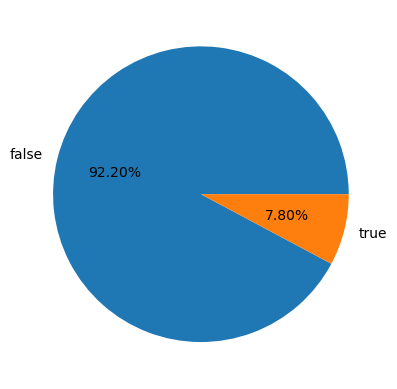

In [60]:
plt.pie(Fever_values[:5],labels=Fever_labels[:5],autopct='%1.2f%%')

#Conclusions : around 92% of proples are not having fever.

In [61]:
Cough_values=df.Cough_symptoms.value_counts().values
Cough_labels=df.Cough_symptoms.value_counts().index

([<matplotlib.patches.Wedge at 0x1c0350bdc00>,
 [Text(-0.977842176747984, 0.5038101600531342, 'false'),
  Text(0.9778421767479841, -0.5038101600531338, 'true')],
 [Text(-0.5333684600443549, 0.27480554184716405, '84.86%'),
  Text(0.5333684600443549, -0.2748055418471639, '15.14%')])

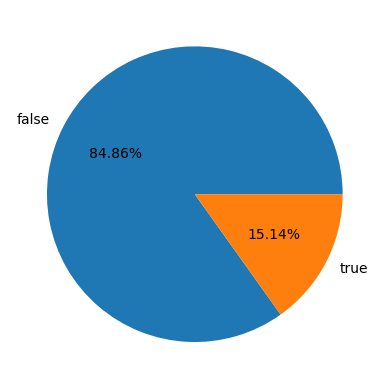

In [62]:
plt.pie(Cough_values,labels=Cough_labels,autopct='%1.2f%%')

 Conclusions : around 85% of proples are not having Cough_symptoms.

In [63]:
Shortness_breath_values=df.Shortness_of_breath.value_counts().values
Shortness_breath_labels=df.Shortness_of_breath.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02f158b20>,
 [Text(-1.0998263883439692, 0.01954265852592342, 'false'),
  Text(1.099826388515505, -0.01954264887218808, 'true')],
 [Text(-0.5999053027330741, 0.010659631923230955, '99.43%'),
  Text(0.599905302826639, -0.010659626657557134, '0.57%')])

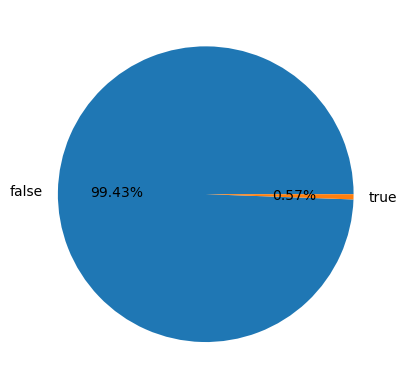

In [64]:
plt.pie(Shortness_breath_values,labels=Shortness_breath_labels,autopct='%1.2f%%')

 Conclusions : around 99.43% of proples are not having shortness_of_breath.

In [65]:
Headache_values=df.Headache.value_counts().values
Headache_labels=df.Headache.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02f17fbb0>,
 [Text(-1.0995932061916234, 0.02991288848015602, 'false'),
  Text(1.0995932069793048, -0.02991285952509001, 'true')],
 [Text(-0.5997781124681582, 0.016316120989176012, '99.13%'),
  Text(0.5997781128978026, -0.016316105195503642, '0.87%')])

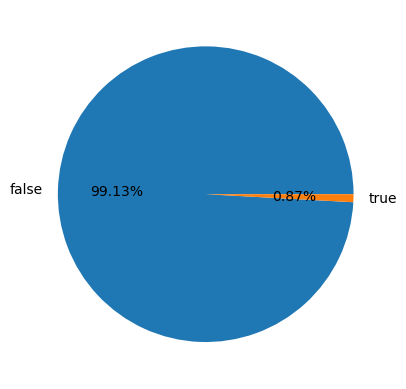

In [66]:
plt.pie(Headache_values,labels=Headache_labels,autopct='%1.2f%%')

In [67]:
Sore_throat_values=df.Sore_throat.value_counts().values
Sore_throat_labels=df.Sore_throat.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02f1da8c0>,
 [Text(-1.0997410460287687, 0.023866957903135536, 'false'),
  Text(1.0997410462033455, -0.023866949858981003, 'true')],
 [Text(-0.5998587523793283, 0.013018340674437563, '99.31%'),
  Text(0.599858752474552, -0.01301833628671691, '0.69%')])

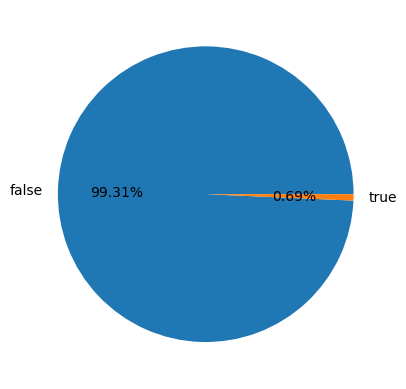

In [68]:
plt.pie(Sore_throat_values,labels=Sore_throat_labels,autopct='%1.2f%%')

In [69]:
Sex_values=df.Sex.value_counts().values
Sex_labels=df.Sex.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02f239660>,
 [Text(-0.12732425158643812, 1.0926063037333957, 'female'),
  Text(0.12732425158643845, -1.0926063037333957, 'male')],
 [Text(-0.06944959177442078, 0.5959670747636704, '53.69%'),
  Text(0.06944959177442096, -0.5959670747636703, '46.31%')])

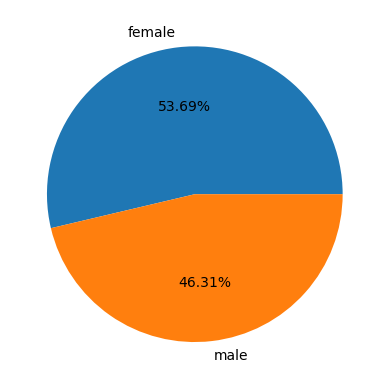

In [70]:
plt.pie(Sex_values,labels=Sex_labels,autopct='%1.2f%%')

In [71]:
Corona_values=df.Corona.value_counts().values
Corona_labels=df.Corona.value_counts().index

([<matplotlib.patches.Wedge at 0x1c02f2a05e0>,
 [Text(-1.084889544434868, 0.181699412150686, 'negative'),
  Text(1.0848895274229364, -0.18169951372537557, 'positive')],
 [Text(-0.5917579333281098, 0.09910877026401053, '94.72%'),
  Text(0.5917579240488744, -0.09910882566838668, '5.28%')])

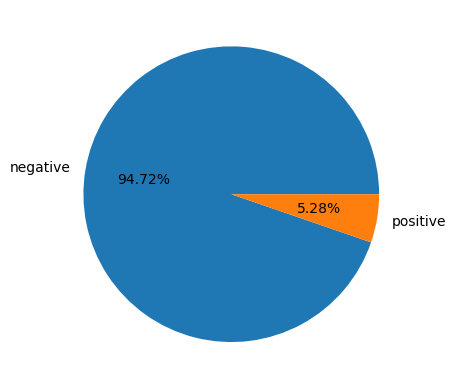

In [72]:
plt.pie(Corona_values,labels=Corona_labels,autopct='%1.2f%%')

### Conclusion: 
Here, the target column "Corona" is having 94.72% negative and 5.28% positive which means the data is "Imbalanced data". So, we 
need to do Sampling techniques.

In [73]:
positive=df[df['Corona']=='positive']
negative = df[df['Corona']=='negative']

In [74]:
print(positive.shape,negative.shape)

(14729, 11) (264119, 11)


In [75]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,None,male,Other


In [76]:
copy_df=df.copy()

In [77]:
copy_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,None,male,Other


# Under Sampling technique

In [78]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


In [79]:
# Create a RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the DataFrame
X_resampled, y_resampled = under_sampler.fit_resample(df.drop('Corona', axis=1), df['Corona'])

# Combine the features and the target variable into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [80]:
df_resampled

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,76931,02-04-2020,false,false,false,false,false,Yes,male,Other,negative
1,100443,05-04-2020,false,false,false,false,false,No,male,Other,negative
2,257922,27-04-2020,false,false,false,false,false,None,male,Other,negative
3,242788,25-04-2020,false,false,false,false,false,None,female,Other,negative
4,25975,25-03-2020,false,false,false,false,false,No,male,Other,negative
...,...,...,...,...,...,...,...,...,...,...,...
29453,278837,30-04-2020,false,false,false,false,false,None,female,Other,positive
29454,278839,30-04-2020,false,false,false,false,false,None,male,Other,positive
29455,278840,30-04-2020,false,false,false,false,false,None,male,Other,positive
29456,278843,30-04-2020,false,false,false,false,false,None,female,Other,positive


In [81]:
positive=df_resampled[df_resampled['Corona']=='positive']
negative = df_resampled[df_resampled['Corona']=='negative']

print(positive.shape,negative.shape)

(14729, 11) (14729, 11)


In [82]:
positive=df_resampled[df_resampled['Cough_symptoms']=='true']
negative = df_resampled[df_resampled['Cough_symptoms']=='false']

print(positive.shape,negative.shape)

(8611, 11) (20847, 11)


In [83]:
positive=df_resampled[df_resampled['Fever']=='true']
negative = df_resampled[df_resampled['Fever']=='false']

print(positive.shape,negative.shape)

(6458, 11) (23000, 11)


In [84]:
positive=df_resampled[df_resampled['Headache']=='true']
negative = df_resampled[df_resampled['Headache']=='false']

print(positive.shape,negative.shape)

(2251, 11) (27207, 11)


In [85]:
df_resampled

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,76931,02-04-2020,false,false,false,false,false,Yes,male,Other,negative
1,100443,05-04-2020,false,false,false,false,false,No,male,Other,negative
2,257922,27-04-2020,false,false,false,false,false,None,male,Other,negative
3,242788,25-04-2020,false,false,false,false,false,None,female,Other,negative
4,25975,25-03-2020,false,false,false,false,false,No,male,Other,negative
...,...,...,...,...,...,...,...,...,...,...,...
29453,278837,30-04-2020,false,false,false,false,false,None,female,Other,positive
29454,278839,30-04-2020,false,false,false,false,false,None,male,Other,positive
29455,278840,30-04-2020,false,false,false,false,false,None,male,Other,positive
29456,278843,30-04-2020,false,false,false,false,false,None,female,Other,positive


In [86]:
positive=df_resampled[df_resampled['Sore_throat']=='true']
negative = df_resampled[df_resampled['Sore_throat']=='false']

print(positive.shape,negative.shape)

(1555, 11) (27903, 11)


In [87]:
positive=df_resampled[df_resampled['Sex']=='female']
negative = df_resampled[df_resampled['Sex']=='male']

print(positive.shape,negative.shape)

(15160, 11) (14298, 11)


# 2) Data Wrangling

In [88]:
# ordinal encoding:

df_resampled["Corona_map"]=df_resampled['Corona'].map({'positive':1, 'negative':0})

In [89]:
df_resampled

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona,Corona_map
0,76931,02-04-2020,false,false,false,false,false,Yes,male,Other,negative,0
1,100443,05-04-2020,false,false,false,false,false,No,male,Other,negative,0
2,257922,27-04-2020,false,false,false,false,false,None,male,Other,negative,0
3,242788,25-04-2020,false,false,false,false,false,None,female,Other,negative,0
4,25975,25-03-2020,false,false,false,false,false,No,male,Other,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29453,278837,30-04-2020,false,false,false,false,false,None,female,Other,positive,1
29454,278839,30-04-2020,false,false,false,false,false,None,male,Other,positive,1
29455,278840,30-04-2020,false,false,false,false,false,None,male,Other,positive,1
29456,278843,30-04-2020,false,false,false,false,false,None,female,Other,positive,1


In [90]:
df_resampled["Sex_map"]=df_resampled['Sex'].map({'male':1, 'female':0})
df_resampled["Cough_symptoms_map"]=df_resampled['Cough_symptoms'].map({'true':1, 'false':0})
df_resampled["Fever_map"]=df_resampled['Fever'].map({'true':1, 'false':0})
df_resampled["Headache_map"]=df_resampled['Headache'].map({'true':1, 'false':0})
df_resampled["Sore_throat_map"]=df_resampled['Sore_throat'].map({'true':1, 'false':0})
df_resampled["Shortness_of_breath_map"]=df_resampled['Shortness_of_breath'].map({'true':1, 'false':0})

In [91]:
df_resampled

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
0,76931,02-04-2020,false,false,false,false,false,Yes,male,Other,negative,0,1,0,0,0,0,0
1,100443,05-04-2020,false,false,false,false,false,No,male,Other,negative,0,1,0,0,0,0,0
2,257922,27-04-2020,false,false,false,false,false,None,male,Other,negative,0,1,0,0,0,0,0
3,242788,25-04-2020,false,false,false,false,false,None,female,Other,negative,0,0,0,0,0,0,0
4,25975,25-03-2020,false,false,false,false,false,No,male,Other,negative,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29453,278837,30-04-2020,false,false,false,false,false,None,female,Other,positive,1,0,0,0,0,0,0
29454,278839,30-04-2020,false,false,false,false,false,None,male,Other,positive,1,1,0,0,0,0,0
29455,278840,30-04-2020,false,false,false,false,false,None,male,Other,positive,1,1,0,0,0,0,0
29456,278843,30-04-2020,false,false,false,false,false,None,female,Other,positive,1,0,0,0,0,0,0


In [92]:
df_resampled=df_resampled.drop(['Ind_ID','Cough_symptoms','Fever','Sore_throat','Age_60_above','Shortness_of_breath','Headache','Sex'],axis=1)

In [93]:
df_resampled

,Test_date,Known_contact,Corona,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
0,02-04-2020,Other,negative,0,1,0,0,0,0,0
1,05-04-2020,Other,negative,0,1,0,0,0,0,0
2,27-04-2020,Other,negative,0,1,0,0,0,0,0
3,25-04-2020,Other,negative,0,0,0,0,0,0,0
4,25-03-2020,Other,negative,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29453,30-04-2020,Other,positive,1,0,0,0,0,0,0
29454,30-04-2020,Other,positive,1,1,0,0,0,0,0
29455,30-04-2020,Other,positive,1,1,0,0,0,0,0
29456,30-04-2020,Other,positive,1,0,0,0,0,0,0


In [94]:
df_resampled=df_resampled.drop(['Known_contact','Corona'],axis=1)

In [95]:
df_resampled

,Test_date,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
0,02-04-2020,0,1,0,0,0,0,0
1,05-04-2020,0,1,0,0,0,0,0
2,27-04-2020,0,1,0,0,0,0,0
3,25-04-2020,0,0,0,0,0,0,0
4,25-03-2020,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29453,30-04-2020,1,0,0,0,0,0,0
29454,30-04-2020,1,1,0,0,0,0,0
29455,30-04-2020,1,1,0,0,0,0,0
29456,30-04-2020,1,0,0,0,0,0,0


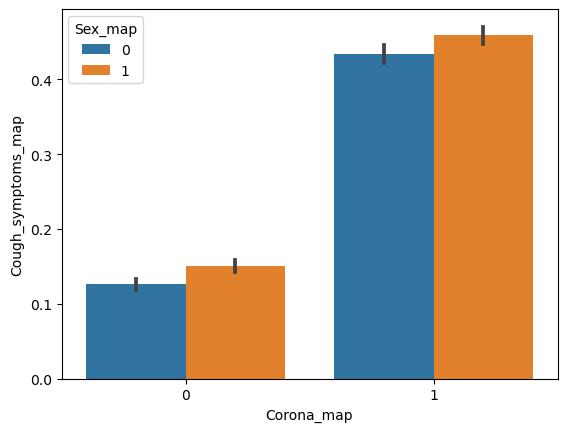

In [96]:
# Finding relations between features

sns.barplot(x="Corona_map",y="Cough_symptoms_map", data=df_resampled, hue="Sex_map")
plt.show()

### Observation:
Cough_symptoms are high in males than females with respect to Corona positive.

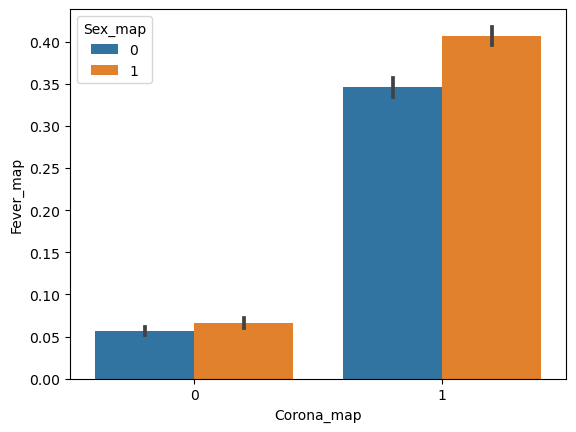

In [97]:
# Finding relations between features

sns.barplot(x="Corona_map",y="Fever_map", data=df_resampled, hue="Sex_map")
plt.show()

### Observation:
Fever is high in males than females with respect to Corona positive.

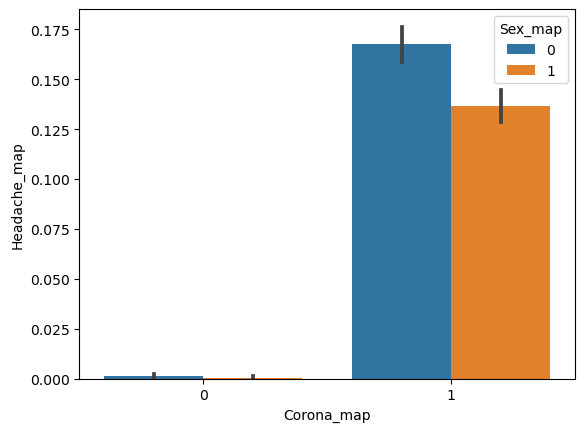

In [98]:
# Finding relations between features

sns.barplot(x="Corona_map",y="Headache_map", data=df_resampled, hue="Sex_map")
plt.show()

### Observation:
Headache is high in females than males with respect to Corona positive.

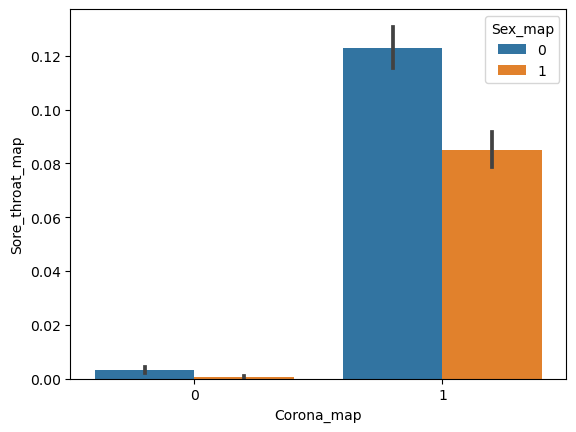

In [99]:
# Finding relations between features

sns.barplot(x="Corona_map",y="Sore_throat_map", data=df_resampled, hue="Sex_map")
plt.show()

### Observation:
Sore_Throat symptoms are high in females than males with respect to Corona positive.

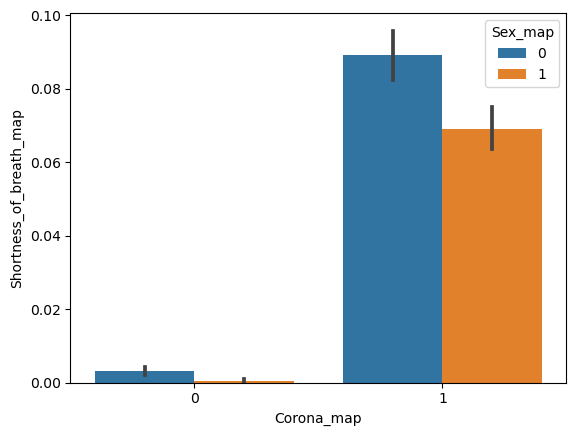

In [100]:
# Finding relations between features

sns.barplot(x="Corona_map",y="Shortness_of_breath_map", data=df_resampled, hue="Sex_map")
plt.show()

### Observation:
Shortness of breath symptoms are high in females than males with respect to Corona positive.

## Conclusions:

Fever and Cough symptoms are major symptoms seen in males whereas Sore_Throat, Shortness_of_breath and Headaches are majorly seen in females with respect to corona positive cases.

 # 3) Feature Selection :

In [101]:
# Using Chi-Square test to categorical feature for feature selection.

df_resampled

,Test_date,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
0,02-04-2020,0,1,0,0,0,0,0
1,05-04-2020,0,1,0,0,0,0,0
2,27-04-2020,0,1,0,0,0,0,0
3,25-04-2020,0,0,0,0,0,0,0
4,25-03-2020,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29453,30-04-2020,1,0,0,0,0,0,0
29454,30-04-2020,1,1,0,0,0,0,0
29455,30-04-2020,1,1,0,0,0,0,0
29456,30-04-2020,1,0,0,0,0,0,0


In [102]:
df_resampled['Test_date'] = pd.to_datetime(df_resampled['Test_date'], format='%d-%m-%Y')

In [103]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29458 entries, 0 to 29457
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Test_date                29458 non-null  datetime64[ns]
 1   Corona_map               29458 non-null  int64         
 2   Sex_map                  29458 non-null  int64         
 3   Cough_symptoms_map       29458 non-null  int64         
 4   Fever_map                29458 non-null  int64         
 5   Headache_map             29458 non-null  int64         
 6   Sore_throat_map          29458 non-null  int64         
 7   Shortness_of_breath_map  29458 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.8 MB


In [104]:
df_resampled.to_csv("covid_19_after_encoding.csv")

## Split the entire dataset into train_dateset and test_dataset

In [105]:
# Filter the DataFrame based on the date ranges
a_date1 = pd.to_datetime('11-03-2020', format='%d-%m-%Y')
a_date2 = pd.to_datetime('15-04-2020', format='%d-%m-%Y')
b_date1 = pd.to_datetime('16-04-2020', format='%d-%m-%Y')
b_date2 = pd.to_datetime('30-04-2020', format='%d-%m-%Y')

train_df = df_resampled[(df_resampled['Test_date'] >= a_date1) & (df_resampled['Test_date'] <= a_date2)]
test_df = df_resampled[(df_resampled['Test_date'] >= b_date1) & (df_resampled['Test_date'] <= b_date2)]

In [106]:
train_df.sort_values(by='Test_date', ascending=True)

,Test_date,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
13055,2020-03-11,0,0,0,0,0,0,0
8903,2020-03-11,0,0,0,1,1,0,0
14747,2020-03-11,1,0,0,0,0,0,0
219,2020-03-11,0,0,0,0,0,0,0
14746,2020-03-11,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
5922,2020-04-15,0,0,0,0,0,0,0
5867,2020-04-15,0,0,0,0,0,0,0
5850,2020-04-15,0,1,0,0,0,0,0
6304,2020-04-15,0,1,0,0,0,0,0


In [107]:
test_df.sort_values(by='Test_date', ascending=True)

,Test_date,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
26918,2020-04-16,1,0,1,0,0,0,0
14142,2020-04-16,0,0,0,0,0,0,0
4970,2020-04-16,0,1,0,0,0,0,0
9855,2020-04-16,0,1,1,0,0,0,0
9853,2020-04-16,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4913,2020-04-30,0,1,0,0,0,0,0
4870,2020-04-30,0,0,0,0,0,0,0
4841,2020-04-30,0,0,0,0,0,0,0
5325,2020-04-30,0,1,0,0,0,0,0


In [108]:
from sklearn.feature_selection import chi2
x=df_resampled.drop(columns=['Test_date','Corona_map'],axis=1)
y=df_resampled['Corona_map']

In [109]:
chi_scores=chi2(x,y)
chi_scores

(array([  38.29906281, 2411.59551736, 3362.58903685, 2187.45490893,
        1441.16334405, 1079.81978206]),
 array([6.06917868e-010, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 8.03483120e-237]))

<Axes: >

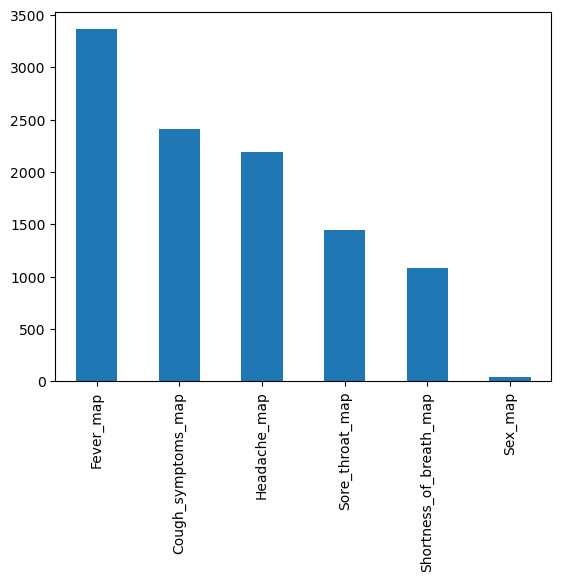

In [110]:
# higher the chi values higher the importance
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

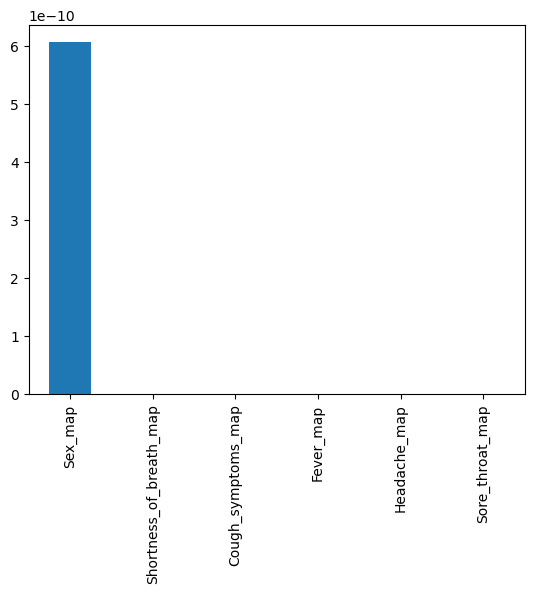

In [111]:
# higher the p values lower the importance
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

# Modelling 

## 1) Logistic Regression

In [112]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [113]:
train_df

,Test_date,Corona_map,Sex_map,Cough_symptoms_map,Fever_map,Headache_map,Sore_throat_map,Shortness_of_breath_map
0,2020-04-02,0,1,0,0,0,0,0
1,2020-04-05,0,1,0,0,0,0,0
4,2020-03-25,0,1,0,0,0,0,0
5,2020-04-09,0,1,0,0,0,0,0
7,2020-03-29,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
26755,2020-04-15,1,1,0,0,0,0,0
26756,2020-04-15,1,0,0,0,0,0,0
26757,2020-04-15,1,1,0,0,0,0,0
26758,2020-04-15,1,1,0,0,0,0,0


In [114]:
# Separate the train dataset and test dataset:
X_train_df = train_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_train_df = train_df['Corona_map']

X_test_df = test_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_test_df = test_df['Corona_map']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train,y_valid = train_test_split(X_train_df, y_train_df, test_size=0.2,random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model.predict(X_test_df)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test_df)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report,log_loss
accuracy = accuracy_score(y_test_df, y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
precision = precision_score(y_test_df, y_pred_test)
recall = recall_score(y_test_df, y_pred_test)

# Print the model's coefficients and evaluation metrics
print("Test Accuracy:", accuracy)
print("Train Accuracy:", accuracy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Confusion Matrix:")
confusion= confusion_matrix(y_test_df, y_pred_test)
print(confusion)
report = classification_report(y_test_df, y_pred_test)
print("Classification Report:\n", report)

# Calculate log loss (cross-entropy)
logloss = log_loss(y_test_df, y_pred_proba)
print(f"Log Loss: {logloss}")

Test Accuracy: 0.7276870067800378
Train Accuracy: 0.7489613880742912
Coefficients: [[0.86080638 1.71202274 2.84181623 3.93807579 2.46194736]]
Intercept: [-0.55769297]
Accuracy: 0.7276870067800378
Precision: 0.5697412823397076
Recall: 0.37546330615270573
Confusion Matrix:
[[5534  765]
 [1685 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6299
           1       0.57      0.38      0.45      2698

    accuracy                           0.73      8997
   macro avg       0.67      0.63      0.64      8997
weighted avg       0.71      0.73      0.71      8997

Log Loss: 0.6200764409607731


In [115]:
# train_df.to_csv("train_corona_dataset.csv")

In [116]:
# test_df.to_csv("test_corona_dataset.csv")

In [117]:
# train vs valid vs test training:

y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test_df)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
accuracy_test = accuracy_score(y_test_df, y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)

print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)
print("Valid Accuracy:", accuracy_valid)

Test Accuracy: 0.7276870067800378
Train Accuracy: 0.7489613880742912
Valid Accuracy: 0.7493281211825067


In [118]:
precision = precision_score(y_valid, y_pred_valid)
recall = recall_score(y_valid, y_pred_valid)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8524672708962739
Recall: 0.6978565539983512


In [119]:
reports = classification_report(y_valid, y_pred_valid)
print("Classification Report:\n", reports)

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73      1667
           1       0.85      0.70      0.77      2426

    accuracy                           0.75      4093
   macro avg       0.75      0.76      0.75      4093
weighted avg       0.77      0.75      0.75      4093



# 2) Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test_dt = model.predict(X_test_df)
# Make predictions on the training data
y_pred_train_dt = model.predict(X_train)
# Make predictions
y_pred_proba = model.predict_proba(X_test_df)


accuracy_test_dt = accuracy_score(y_test_df, y_pred_test_dt)
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
print("Test Accuracy:", accuracy_test_dt)
print("Train Accuracy:", accuracy_train_dt)

# Evaluate the model performance
accuracy = accuracy_score(y_test_df, y_pred_test_dt)
precision = precision_score(y_test_df, y_pred_test_dt)
recall = recall_score(y_test_df, y_pred_test_dt)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

reports = classification_report(y_test_df, y_pred_test_dt)
print("Classification Report:\n", reports)

# Calculate log loss (cross-entropy)
logloss = log_loss(y_test_df, y_pred_proba)
print(f"Log Loss: {logloss}")

Test Accuracy: 0.7276870067800378
Train Accuracy: 0.7489613880742912
Accuracy: 0.7276870067800378
Precision: 0.5697412823397076
Recall: 0.37546330615270573
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6299
           1       0.57      0.38      0.45      2698

    accuracy                           0.73      8997
   macro avg       0.67      0.63      0.64      8997
weighted avg       0.71      0.73      0.71      8997

Log Loss: 0.6122372094249677


In [121]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 4, 5, 7, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

accuracy = best_clf.score(X_test_df, y_test_df)
print("Test Accuracy:", accuracy)

cross_val_scores = cross_val_score(best_clf, X_train_df, y_train_df, cv=5)
mean_cv_score = np.mean(cross_val_scores)
print("Cross-Validation Mean Accuracy:", mean_cv_score)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.7276870067800378
Cross-Validation Mean Accuracy: 0.7490321792517516


# 3) KNN Classifier

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Separate the train dataset and test dataset:
X_train_df = train_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_train_df = train_df['Corona_map']

X_test_df = test_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_test_df = test_df['Corona_map']

# Split the data into training and testing sets
X_train,X_valid, y_train,y_valid = train_test_split(X_train_df, y_train_df, test_size=0.2,random_state=42)

# Create a KNN classifier with a specified number of neighbors (e.g., k=5).
knn = KNeighborsClassifier(n_neighbors=7)

# Train the classifier on the training data.
knn.fit(X_train, y_train)

# Predict class labels for the test data.
y_pred_test_knn = knn.predict(X_test_df)
y_pred_train_knn= knn.predict(X_train)
# Make predictions
y_pred_proba = knn.predict_proba(X_test_df)

test_accuracy = accuracy_score(y_test_df, y_pred_test_knn)
print(f'Test Accuracy: {test_accuracy:}')
train_accuracy = accuracy_score(y_train, y_pred_train_knn)
print(f'Train Accuracy: {train_accuracy:}')

recision = precision_score(y_test_df, y_pred_test_knn)
recall = recall_score(y_test_df, y_pred_test_knn)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(y_test_df, y_pred_test_knn))

conf_matrix = confusion_matrix(y_test_df, y_pred_test_knn)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate log loss (cross-entropy)
logloss = log_loss(y_test_df, y_pred_proba)
print(f"Log Loss: {logloss}")

Test Accuracy: 0.7276870067800378
Train Accuracy: 0.7489613880742912
Precision: 0.5697412823397076
Recall: 0.37546330615270573
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      6299
           1       0.57      0.38      0.45      2698

    accuracy                           0.73      8997
   macro avg       0.67      0.63      0.64      8997
weighted avg       0.71      0.73      0.71      8997

Confusion Matrix:
[[5534  765]
 [1685 1013]]
Log Loss: 0.5922055101121366


In [123]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = KNeighborsClassifier(**best_params)
best_clf.fit(X_train, y_train)

accuracy = best_clf.score(X_test_df, y_test_df)
print("Test Accuracy:", accuracy)

cross_val_scores = cross_val_score(best_clf, X_train_df, y_train_df, cv=5)
mean_cv_score = np.mean(cross_val_scores)
print("Cross-Validation Mean Accuracy:", mean_cv_score)


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Test Accuracy: 0.7276870067800378
Cross-Validation Mean Accuracy: 0.5577405598428903


# 4) XG Boost Classifier

In [124]:
# Separate the train dataset and test dataset:
X_train_df = train_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_train_df = train_df['Corona_map']

X_test_df = test_df[['Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map']]
y_test_df = test_df['Corona_map']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train,y_valid = train_test_split(X_train_df, y_train_df, test_size=0.2,random_state=42)

import xgboost as xgb
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_xg = xgb_classifier.predict(X_test_df)
y_pred_train_xg = xgb_classifier.predict(X_train)
# Make predictions
y_pred_proba = xgb_classifier.predict_proba(X_test_df)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report, log_loss
accuracy_test = accuracy_score(y_test_df, y_pred_test_xg)
accuracy_train = accuracy_score(y_train,y_pred_train_xg)
precision = precision_score(y_test_df, y_pred_test_xg)
recall = recall_score(y_test_df, y_pred_test_xg)

print("Test Accuracy:", accuracy_test)
print("Train Accuracy:", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test_df, y_pred_test_xg)
print('Confusion Matrix:')
print(conf_matrix)

# Print the confusion matrix
report = classification_report(y_test_df, y_pred_test_xg)
print("Classification Report:\n", report)

# Calculate log loss (cross-entropy)
logloss = log_loss(y_test_df, y_pred_proba)
print(f"Log Loss: {logloss}")


Test Accuracy: 0.7276870067800378
Train Accuracy: 0.7489613880742912
Precision: 0.5697412823397076
Recall: 0.37546330615270573
Confusion Matrix:
[[5534  765]
 [1685 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6299
           1       0.57      0.38      0.45      2698

    accuracy                           0.73      8997
   macro avg       0.67      0.63      0.64      8997
weighted avg       0.71      0.73      0.71      8997

Log Loss: 0.6122432338598558


In [125]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters and their ranges for grid search
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.03, 0.001],
    'max_depth': [1, 2, 4],
    'min_child_weight': [1, 3, 5],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new XGBoost classifier with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_classifier.predict(X_test_df)

# Evaluate the tuned model
accuracy = accuracy_score(y_test_df, y_pred)

# Print the best parameters and evaluation metric
print("Best Parameters:", best_params)
print(f"Tuned XGBoost Accuracy: {accuracy:.2f}")

cross_val_scores = cross_val_score(best_xgb_classifier, X_train_df, y_train_df, cv=5)
mean_cv_score = np.mean(cross_val_scores)
print("Cross-Validation Mean Accuracy:", mean_cv_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100}
Tuned XGBoost Accuracy: 0.73
Cross-Validation Mean Accuracy: 0.7490321792517516


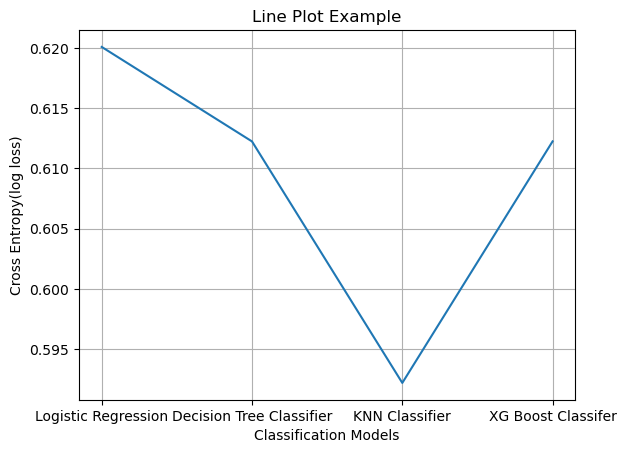

In [126]:
# Plot Classification models vs cross entropy(log loss)

X=["Logistic Regression","Decision Tree Classifier","KNN Classifier","XG Boost Classifer"]
y = [0.6200764409607731,0.6122372094249677,0.5922055101121366, 0.6122432338598558]

plt.plot(X,y)
# Add labels and a title
plt.xlabel('Classification Models')
plt.ylabel('Cross Entropy(log loss)')
plt.title('Line Plot Example')

# Show the plot
plt.grid(True)
plt.show()

## Section 1: Questions to Answer
===============================================

### What questions do you want to answer? 
=================================================


#### 1) Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

1) The Covid 19 is very much important in today's world because it helps patients for early intervention and treatment, helps to allocate resources more efficient, enables personalized preventive care, resuce healthcare costs and improves quality of life.
2) Overall, accurate disease prediction not only has the potential to save lives but also to transform healthcare systems, reduce costs, and improve the overall quality of healthcare delivery, making it a critical component of modern medicine.
--------------------------------------------------------------------------------------------------------------------------------

#### 2) How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

The accurate disease prediction and effective screening not only benefit individual patients but also have a profound impact on the healthcare system as a whole. By reducing the burden on healthcare resources, optimizing patient care, and preventing diseases, they can lead to improved healthcare quality, reduced costs, and a healthier population.

--------------------------------------------------------------------------------------------------------------------------------

#### 3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.
1) Yes there are some gaps in the knowledge of proposed method like incomplete data i.e., lot of 'none' values so improvements in data collection and sharing will be crucial.
2) The interactions between different diseases and how they affect each other. 
3) it's crucial to develop rapid response and early detection methods for emerging infectious diseases. These methods should consider epidemiological, genetic, and clinical data.

================================================================================================================================

## Section 2: Initial Hypothesis (or hypotheses)
================================================================

### Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track. 
================================================================================================================================

#### 1) If DA track please aim to identify patterns in the data and important features that may impact a ML model.

The dataset contains Cough_symptoms, Headache, sore_throat, test_date, Ind_id, shortness_of_breath, Fever, corona, sex, age_60_above and abroad columns. Out of those important features are Cough_symptoms, Headache, sore_throat,shortness_of_breath, Fever, corona. Here, Corona is target feature. These features are categorical variables so performed countplot to identify patterns and used barplot to identify relation between features.

-------------------------------------------------------------------------------------------------------------------------------

#### 2) If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there are any assumptions and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

In ML, I choose classification models because the dataset contains categorical variables but no numerical variables. In classification models I used logistic regression as base model then after Decision Tree model, KNN model and XG-Boost model. I used Binary Cross Entropy(Log loss) cost function in all those models saying that KNN classifer has lower log loss value which means better model.

--------------------------------------------------------------------------------------------------------------------------------
#### 3) From step 1, you may see some relationship that you want to explore and will develop a belief about data

Yes, there is a relation between features Cough_symptoms, Headache, sore_throat, shortness_of_breath, Fever on target variable i.e., corona. As these symptoms increases the corona patients are increase. Sex column gives which symptoms shows majority on male and females.



================================================================================================================================

## Section 3: Data analysis approach
===================================================

#### 1) What approach are you going to take in order to prove or disprove your hypothesis?
My approach is understanding the dataset and check the data whether any missing values or wrong data is present. After that data cleaning has to be done and then check the target variable whether the data is under sample or over sample. Then after perform data wrangling to convert features and then perform feature selection to know which feature suitable for modelling. Finally, perform modelling to know the accuracy of the data. This is my approach to prove the Hypothesis.

--------------------------------------------------------------------------------------------------------------------------------

#### 2) What feature engineering techniques will be relevant to your project?
In Feature Engineering, data wrangling has performed to convert categorical variable to numerical variable, in that ordinal encoding used. Then after converting date feature int datatype to datetime datatype and implemented some graphs like barplot to know the relation between features. Finally feature selection in that chi squared test is used to know better features for modelling.

--------------------------------------------------------------------------------------------------------------------------------
#### 3) Please justify your data analysis approach.
In data Analysis, used pie plot to know how much percentages of unique records are present and also to know whether the given data is balanced or not. After plotting the graphs, I understood that the data is imbalanced i.e., target feature has 94% negative and 6% positive. So, I perfromed undersampling to reduce the records to 50%-50%.

--------------------------------------------------------------------------------------------------------------------------------
#### 4) Identify important patterns in your data using the EDA approach to justify your findings.
To findout important patterns, I used barplot to extract the relation between features. I took X axis as target variable i.e., corona and y axis as independent variables i.e., ('Cough_symptoms_map', 'Fever_map', 'Sore_throat_map', 'Headache_map','Shortness_of_breath_map'). After plotting all combinations it concludes that Fever and Cough symptoms are major symptoms seen in males whereas Sore_Throat, Shortness_of_breath and Headaches are majorly seen in females with respect to corona positive cases.

================================================================================================================================
## Section 4: Machine learning approach
=======================================================

#### 1) What method will you use for machine learning based predictions of COVID19?
I used supervised machine learning in that classification models in order to predict the COVID 19.

--------------------------------------------------------------------------------------------------------------------------------
#### 2) Please justify the most appropriate model.
I used classification models because the target variable is categorical variable. In classification, I choosed logistic regression as base model and after decision tree classifier , KNN classifier and XGBoost classifer models used to compare the accuracy with base model. Out of 4 models, I got nearly same accuracy in all models but cross entropy value is lower in KNN then after XGBoost, Decision Tree classifier and logistic regression. The accuracy is 0.75 for train accuracy and 0.73 for test accuracy beacuse the data is balanced and good data quality.

--------------------------------------------------------------------------------------------------------------------------------

#### 3) Please perform necessary steps required to improve the accuracy of your model.
I performed cross validation and hyper parameter tuning to get best parameters to improve the accuracy of the models.

-------------------------------------------------------------------------------------------------------------------------------

#### 4) Please compare all models (at least 4  models).

1) Logistic regression:

Test Accuracy: 0.7276870067800378,
Train Accuracy: 0.7489613880742912,
Log Loss: 0.6200764409607731,
Precision: 0.5697412823397076,
Recall: 0.37546330615270573

2) Decision Tree Classifier: 

Test Accuracy: 0.7276870067800378,
Train Accuracy: 0.7489613880742912,
Log Loss: 0.6122372094249677,
Precision: 0.5697412823397076,
Recall: 0.37546330615270573

3) KNN Classifer: 

Test Accuracy: 0.7276870067800378,
Train Accuracy: 0.7489613880742912,
Log Loss: 0.5922055101121366,
Precision: 0.5697412823397076,
Recall: 0.37546330615270573

4) XGBoost Classifier:

Test Accuracy: 0.7276870067800378,
Train Accuracy: 0.7489613880742912,
Log Loss: 0.6122432338598558,
Precision: 0.5697412823397076,
Recall: 0.37546330615270573

In comparison of all 4 models, it concludes that all 4 models have shown same train and test accuracies and not much difference in between train accuracy and test accuracy. 
